# Anomaly Detection

In [1]:
import sys
# needed modules
path_to_modules = '../../algorithms_in_python/week_9/ex8/'
sys.path.append(path_to_modules)
from estimateGaussian import estimateGaussian
from multivariateGaussian import multivariateGaussian
from selectThreshold import selectThreshold
from visualizeFit import visualizeFit


import matplotlib.pyplot as plt
import numpy as np
import scipy.io as sio

## Part 1: Load Example Dataset
  We start this exercise by using a small dataset that is easy to
  visualize.
  Our example case consists of 2 network server statistics across
  several machines: the latency and throughput of each machine.
  This exercise will help us find possibly faulty (or very fast) machines.

Visualizing example dataset for outlier detection.




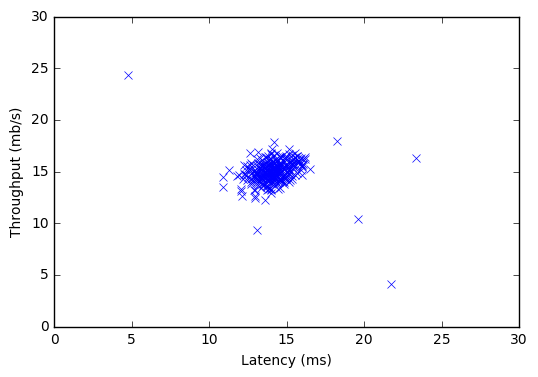

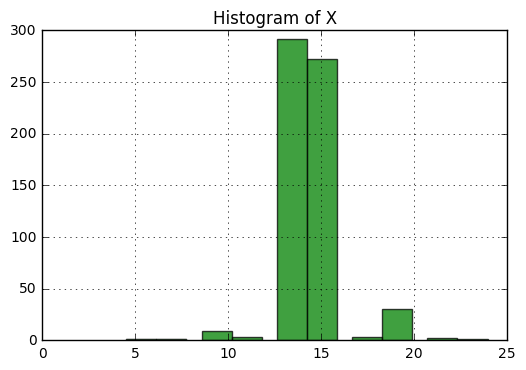

In [3]:
print('Visualizing example dataset for outlier detection.\n\n')
mat_contents = sio.loadmat(path_to_modules + 'ex8data1.mat')
X = mat_contents.get('X')
Xval = mat_contents.get('Xval')
yval = mat_contents.get('yval')

#  Visualize the example dataset
plt.plot(X[:, 0], X[:, 1], 'bx')
plt.axis([0, 30, 0, 30])
plt.xlabel('Latency (ms)')
plt.ylabel('Throughput (mb/s)')
plt.draw()
plt.show(block=False)

# print histo of X to make sure that our features are gaussian

plt.figure(2)
plt.hist(X, 5, facecolor='g', alpha=0.75)
plt.title('Histogram of X')
plt.grid(True)
plt.draw()
plt.show(block=False)

## Part 2: Estimate the dataset statistics
For this exercise, we assume a Gaussian distribution for the dataset.
We first estimate the parameters of our assumed Gaussian distribution, 
then compute the probabilities for each of the points and then visualize 
both the overall distribution and where each of the points falls in 
terms of that distribution.

Visualizing Gaussian fit.




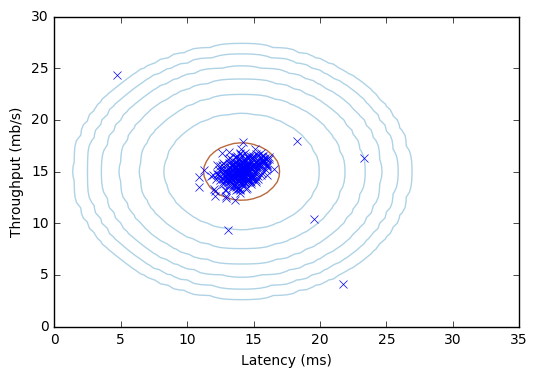

In [4]:
print('Visualizing Gaussian fit.\n\n')

#  Estimate mu and sigma2
mu, sigma2 = estimateGaussian(X)

#  Returns the density of the multivariate normal at each data point (row) 
#  of X
p = multivariateGaussian(X, mu, sigma2)

#  Visualize the fit
plt.figure(1)
visualizeFit(X, mu, sigma2)
plt.xlabel('Latency (ms)')
plt.ylabel('Throughput (mb/s)')
plt.draw()
plt.axis([0, 35, 0, 30])
plt.show(block=False)

## Part 3: Find Outliers
  Now you will find a good epsilon threshold using a cross-validation set
  probabilities given the estimated Gaussian distribution

../../algorithms_in_python/week_9/ex8\selectThreshold.py:22: RuntimeWarning: invalid value encountered in double_scalars
  prec = tp / (tp + fp)


Best epsilon found using cross-validation:  8.99085277927e-05
Best F1 on Cross Validation Set:   0.875
   (you should see a value epsilon of about 8.99e-05)

   (you should see a Best F1 value of  0.875000)




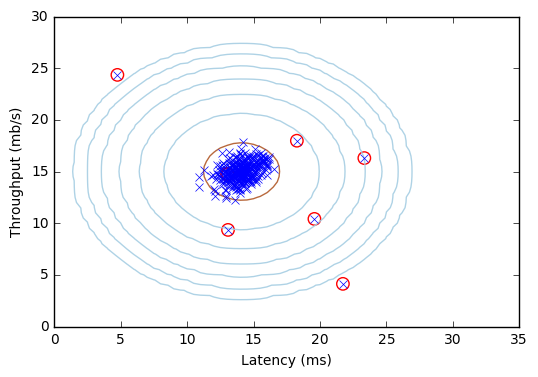

In [7]:
pval = multivariateGaussian(Xval, mu, sigma2)

epsilon, F1 = selectThreshold(yval, pval)
print('Best epsilon found using cross-validation: ', epsilon)
print('Best F1 on Cross Validation Set:  ', F1)
print('   (you should see a value epsilon of about 8.99e-05)\n')
print('   (you should see a Best F1 value of  0.875000)\n\n')

#  Find the outliers in the training set and plot the
outliers = np.where(p < epsilon)

visualizeFit(X, mu, sigma2)
plt.xlabel('Latency (ms)')
plt.ylabel('Throughput (mb/s)')
plt.draw()
plt.axis([0, 35, 0, 30])
#  Draw a red circle around those outliers
plt.scatter(X[outliers, 0], X[outliers, 1], s=80, facecolors='none', edgecolors='r')

plt.draw()
plt.show(block=False)

## Part 4: Multidimensional Outliers
  We will now use the code from the previous part and apply it to a 
  **harder problem** in which more features describe each datapoint and only 
  some features indicate whether a point is an outlier.

In [8]:
#  Loads the second dataset. You should now have the
#  variables X, Xval, yval in your environment
mat = sio.loadmat(path_to_modules + 'ex8data2.mat')
X = mat['X']
print("DataSet shape", X.shape)
Xval = mat['Xval']
yval = mat['yval']

#  Apply the same steps to the larger dataset
mu, sigma2 = estimateGaussian(X)

#  Training set 
p = multivariateGaussian(X, mu, sigma2)

#  Cross-validation set
pval = multivariateGaussian(Xval, mu, sigma2)

#  Find the best threshold
epsilon, F1 = selectThreshold(yval, pval)

print('Best epsilon found using cross-validation: ', epsilon)
print('Best F1 on Cross Validation Set:  ', F1)
print('   (you should see a value epsilon of about 1.38e-18)\n')
print('   (you should see a Best F1 value of 0.615385)\n')
print('# Outliers found: \n\n', sum(p < epsilon))

DataSet shape (1000, 11)
Best epsilon found using cross-validation:  1.37722889076e-18
Best F1 on Cross Validation Set:   0.615384615385
   (you should see a value epsilon of about 1.38e-18)

   (you should see a Best F1 value of 0.615385)

# Outliers found: 

 [117]


../../algorithms_in_python/week_9/ex8\selectThreshold.py:22: RuntimeWarning: invalid value encountered in double_scalars
  prec = tp / (tp + fp)
